## A figure for Allen

In [1]:
import os
print("Working at: \n {}".format(os.getcwd()))

Working at: 
 /Users/danbiderman/Dropbox/Columbia/1.Dan/Research/Paninski/3D-Animal-Pose/PPCA


In [98]:
import numpy as np
import h5py # TODO: not currently in our requirements.yml
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
from tqdm.notebook import tqdm # in the .py script of the LinearGaussian class, no need for notebook
from ipywidgets import IntProgress
import pickle
from utils.TrackingPlottingClasses import Tracking_Video_Generator, \
                                        three_D_skeleton_plotter

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
def load_object(filename):
    with open(filename, 'rb') as input: # note rb and not wb
        return pickle.load(input)

In [5]:
data_path = Path("../../Video_Datasets/Sawtell-data/allen_plot")
os.path.isdir(data_path)

True

In [6]:
obj = load_object(data_path / 'sawtell_points.pickle')

In [7]:
obj['BA']['head'].shape

(5000, 3)

In [8]:
obj['BA'].keys ()
points_dict = {}
points_dict["BA"] = obj['BA'].copy()

In [9]:
points_dict['BA'].keys()

dict_keys(['head', 'chin_base', 'chin1_4', 'chin_half', 'chin3_4', 'chin_tip', 'mid', 'fork', 'stripeA', 'stripeP', 'tail_neck', 'dorsal', 'anal', 'caudal_d', 'caudal_v', 'pectoral_L', 'pectoral_R', 'pelvic_L', 'pelvic_R', 'worm_1', 'worm_2', 'worm_3', 'worm_4', 'worm_5', 'pectoral_L_base', 'pectoral_R_base', 'pelvic_L_base', 'pelvic_R_base'])

In [62]:
for n in short_dict["name"]:
    print(n, n in points_dict['BA'].keys())

head True
chin_base True
chin1_4 True
chin_half True
chin3_4 True
chin_tip True
mid True
fork True
stripeA True
stripeP True
tail_neck True
dorsal True
anal True
caudal_d True
caudal_v True
pectoral_L_base True
pectoral_L True
pectoral_R_base True
pectoral_R True
pelvic_L_base True
pelvic_L True
pelvic_R_base True
pelvic_R True
head True
chin_base True
chin1_4 True
chin_half True
chin3_4 True
chin_tip True
mid True
fork True
stripeA True
stripeP True
tail_neck True
dorsal True
anal True
caudal_d True
caudal_v True
pectoral_L_base True
pectoral_L True
pectoral_R_base True
pectoral_R True
pelvic_L_base True
pelvic_L True
pelvic_R_base True
pelvic_R True
head True
chin_base True
chin1_4 True
chin_half True
chin3_4 True
chin_tip True
mid True
fork True
stripeA True
stripeP True
tail_neck True
dorsal True
anal True
caudal_d True
caudal_v True
pectoral_L_base True
pectoral_L True
pectoral_R_base True
pectoral_R True
pelvic_L_base True
pelvic_L True
pelvic_R_base True
pelvic_R True
overhead_T

In [ ]:
#CORRECT SKELETON
skeleton_short_test

<IPython.core.display.Javascript object>


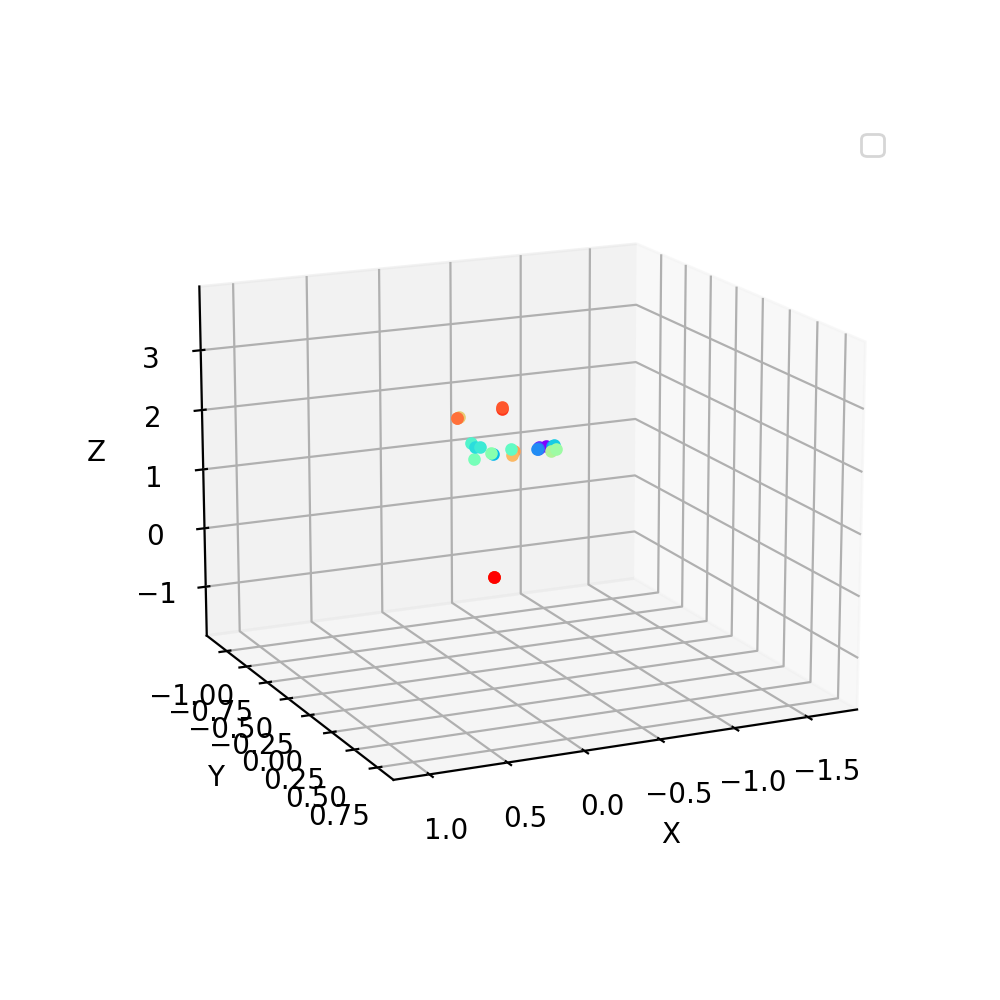

No handles with labels found to put in legend.


The folder already exists at: ../../PCA_infill/3d_images/fish


In [101]:
three_d_plotter = three_D_skeleton_plotter(points_dict, skeleton_dict=short_dict, marker_size = 50, ax = None, 
                 marker_list=None, init_elev = 30, init_azim = 90, 
                 image_folder= Path('../../PCA_infill/3d_images/fish'))
#three_d_plotter.plot_skeleton(1000, "BA")
three_d_plotter.scatter_points(1000)
three_d_plotter.ax.legend()
#three_d_plotter(skeleton_data_sources= None)

In [113]:
three_d_plotter.data_sources

['BA']

In [149]:
dict_for_yaml = {}
dict_for_yaml["skeleton"] = []
dict_for_yaml["bp_names"] = []
for i, (a,b) in enumerate(zip(short_dict["name"],short_dict["parent"])):
    dict_for_yaml["skeleton"].append('[%s, %s]' %(a,b))
    dict_for_yaml["bp_names"].append(a)

In [145]:
s = '[%s, %s]' %(a,b)
s

'[pelvic_R, pelvic_R_base]'

In [146]:
s.replace('\'', '')

'[pelvic_R, pelvic_R_base]'

In [147]:
dict_for_yaml

{'skeleton': ['head, None]',
  'chin_base, head]',
  'chin1_4, chin_base]',
  'chin_half, chin1_4]',
  'chin3_4, chin_half]',
  'chin_tip, chin3_4]',
  'mid, head]',
  'fork, tail_neck]',
  'stripeA, mid]',
  'stripeP, stripeA]',
  'tail_neck, stripeP]',
  'dorsal, stripeA]',
  'anal, stripeA]',
  'caudal_d, fork]',
  'caudal_v, fork]',
  'pectoral_L_base, head]',
  'pectoral_L, pectoral_L_base]',
  'pectoral_R_base, head]',
  'pectoral_R, pectoral_R_base]',
  'pelvic_L_base, mid]',
  'pelvic_L, pelvic_L_base]',
  'pelvic_R_base, mid]',
  'pelvic_R, pelvic_R_base]'],
 'bp_names': ['head',
  'chin_base',
  'chin1_4',
  'chin_half',
  'chin3_4',
  'chin_tip',
  'mid',
  'fork',
  'stripeA',
  'stripeP',
  'tail_neck',
  'dorsal',
  'anal',
  'caudal_d',
  'caudal_v',
  'pectoral_L_base',
  'pectoral_L',
  'pectoral_R_base',
  'pectoral_R',
  'pelvic_L_base',
  'pelvic_L',
  'pelvic_R_base',
  'pelvic_R']}

In [150]:
import yaml

with open(r'skeleton_file.yaml', 'w') as file:
    documents = yaml.dump([dict_for_yaml], file)

(5000, 3)


<IPython.core.display.Javascript object>


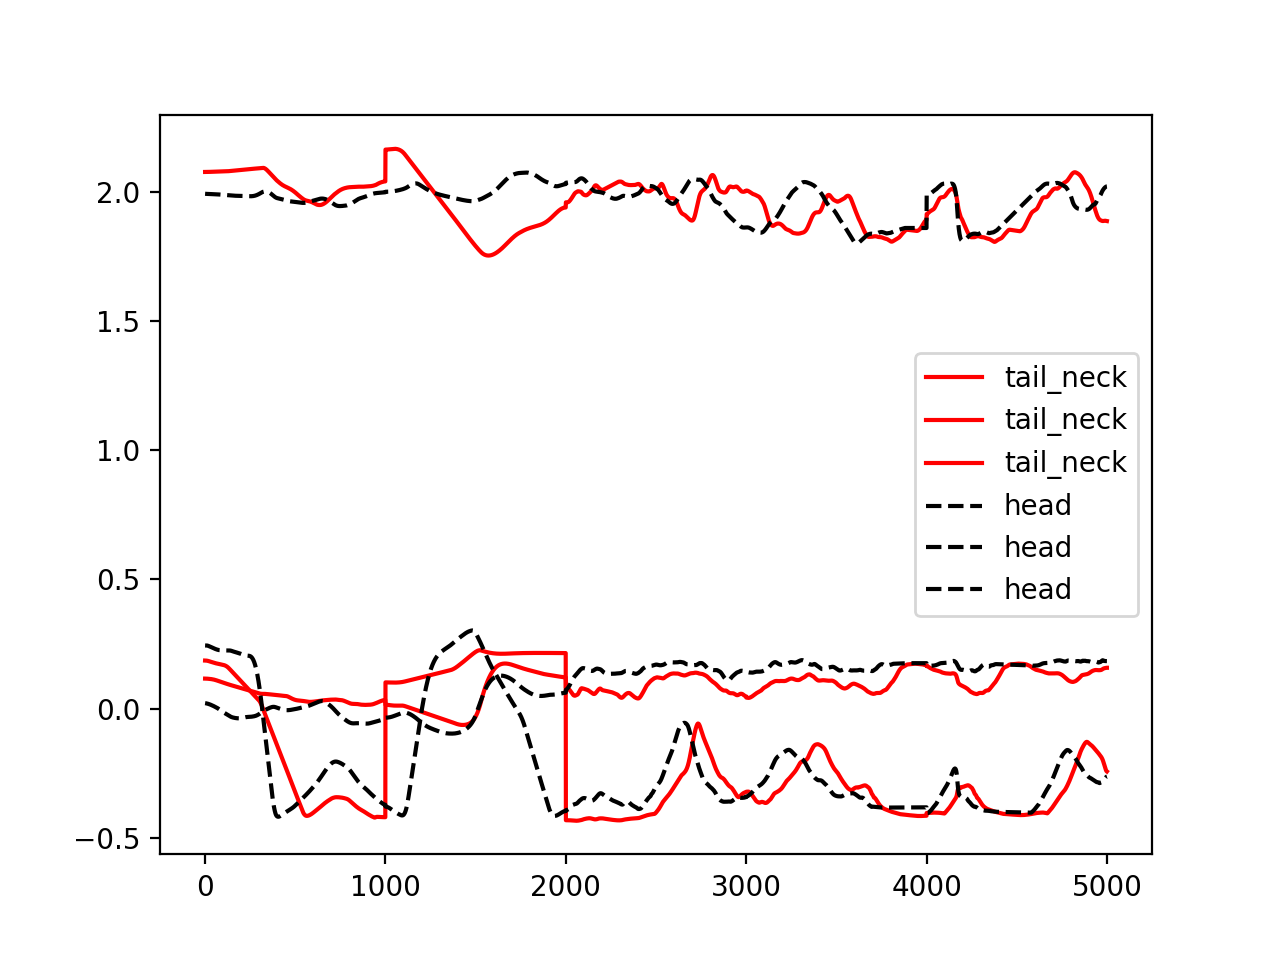

In [114]:
print(three_d_plotter.points["BA"]['tail_neck'].shape)
plt.plot(three_d_plotter.points["BA"]['tail_neck'], 'r', label = 'tail_neck')
plt.plot(three_d_plotter.points["BA"]['head'], '--k', label = 'head')
plt.legend()
plt.savefig('diagnose_3d_coords')

In [115]:
three_d_plotter.lims_dict

{'x': [-1.0557470230770873, 0.4405964052361161],
 'y': [-0.6982094806956154, 0.36238174982511523],
 'z': [-0.3319366402593058, 2.5448475753213446]}

In [68]:
for idx, (name1, name2) in enumerate(zip(short_dict["name"], skeleton_dict["name"])):
    print(idx, (name1, name2))

0 ('head', 'head_main')
1 ('chin_base', 'chin_base_main')
2 ('chin1_4', 'chin1_4_main')
3 ('chin_half', 'chin_half_main')
4 ('chin3_4', 'chin3_4_main')
5 ('chin_tip', 'chin_tip_main')
6 ('mid', 'mid_main')
7 ('fork', 'fork_main')
8 ('stripeA', 'stripeA_main')
9 ('stripeP', 'stripeP_main')
10 ('tail_neck', 'tail_neck_main')
11 ('dorsal', 'dorsal_main')
12 ('anal', 'anal_main')
13 ('caudal_d', 'caudal_d_main')
14 ('caudal_v', 'caudal_v_main')
15 ('pectoral_L_base', 'pectoral_L_base_main')
16 ('pectoral_L', 'pectoral_L_main')
17 ('pectoral_R_base', 'pectoral_R_base_main')
18 ('pectoral_R', 'pectoral_R_main')
19 ('pelvic_L_base', 'pelvic_L_base_main')
20 ('pelvic_L', 'pelvic_L_main')
21 ('pelvic_R_base', 'pelvic_R_base_main')
22 ('pelvic_R', 'pelvic_R_main')
23 ('head', 'head_top')
24 ('chin_base', 'chin_base_top')
25 ('chin1_4', 'chin1_4_top')
26 ('chin_half', 'chin_half_top')
27 ('chin3_4', 'chin3_4_top')
28 ('chin_tip', 'chin_tip_top')
29 ('mid', 'mid_top')
30 ('fork', 'fork_top')
31 ('

In [ ]:
for idx, name in enumerate(self.skeleton_dict["name"]):
    if self.skeleton_dict["parent"][idx] is not None:  # if bodypart has a parent
        name = self.points[data_source][name][frame_idx, :]
        parent = self.points[data_source][self.skeleton_dict["parent"][idx]][frame_idx, :]
        coord_dict = self.pts_to_coords(name, parent)
        self.ax.plot(coord_dict["x"],
                     coord_dict["y"],
                     coord_dict["z"],
                     'gray',
                     marker=None)

In [22]:
skeleton_filename = '../../Video_Datasets/Sawtell-data/tank_skeleton_4.csv'
os.path.isfile(skeleton_filename)
skeleton_raw = pd.read_csv(skeleton_filename).to_dict()

In [79]:
skeleton_dict = {}
max_ind_to_keep = 23
skeleton_dict["name"] = list(skeleton_raw["name"].values())[:max_ind_to_keep]
skeleton_dict["parent"] = list(skeleton_raw["parent"].values())[:max_ind_to_keep]

In [80]:
def concatanate_name_list(list_input):
    sep = '_'
    short_list = []
    for p in list_input:
        if p!=p:
            short_list.append(None)
        else: # ignore the last str indicating view. seperate by '_' and then join using '_'
            short_list.append(sep.join(p.split(sep)[:-1]))
    return short_list

In [95]:
short_dict = {}
for i in skeleton_dict.keys():
    short_dict[i] = concatanate_name_list(skeleton_dict[i])

In [96]:
print(short_dict)
print(short_dict['name'], short_dict['parent'])

{'name': ['head', 'chin_base', 'chin1_4', 'chin_half', 'chin3_4', 'chin_tip', 'mid', 'fork', 'stripeA', 'stripeP', 'tail_neck', 'dorsal', 'anal', 'caudal_d', 'caudal_v', 'pectoral_L_base', 'pectoral_L', 'pectoral_R_base', 'pectoral_R', 'pelvic_L_base', 'pelvic_L', 'pelvic_R_base', 'pelvic_R'], 'parent': [None, 'head', 'chin_base', 'chin1_4', 'chin_half', 'chin3_4', 'head', 'tail_neck', 'mid', 'stripeA', 'stripeP', 'stripeA', 'stripeA', 'fork', 'fork', 'head', 'pectoral_L_base', 'head', 'pectoral_R_base', 'mid', 'pelvic_L_base', 'mid', 'pelvic_R_base']}
['head', 'chin_base', 'chin1_4', 'chin_half', 'chin3_4', 'chin_tip', 'mid', 'fork', 'stripeA', 'stripeP', 'tail_neck', 'dorsal', 'anal', 'caudal_d', 'caudal_v', 'pectoral_L_base', 'pectoral_L', 'pectoral_R_base', 'pectoral_R', 'pelvic_L_base', 'pelvic_L', 'pelvic_R_base', 'pelvic_R'] [None, 'head', 'chin_base', 'chin1_4', 'chin_half', 'chin3_4', 'head', 'tail_neck', 'mid', 'stripeA', 'stripeP', 'stripeA', 'stripeA', 'fork', 'fork', 'head

In [46]:
sep = '_'
sep.join(short_parents[2])

'chin_base'

In [28]:
[print(p != p) for p in skeleton_dict["parent"]]

True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
True
False
False
False
True
False
False
False
True
False
True
False
True
False
False
False
False
True
False
False
False
False
True
False
False
False
False
True
False
False
False
True
False
False
False
True
False
False
False


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [36]:
import matplotlib.cm as cm
n = len(list(points_dict["BA"].keys()))
color=cm.rainbow(np.linspace(0,1,n))
for i,c in zip(range(n),color):
    print(i,c)

0 [0.5 0.  1.  1. ]
1 [0.42941176 0.11065268 0.9984636  1.        ]
2 [0.35882353 0.21994636 0.99385914 1.        ]
3 [0.28039216 0.33815827 0.98516223 1.        ]
4 [0.20980392 0.44021574 0.9741386  1.        ]
5 [0.13137255 0.54721955 0.95838122 1.        ]
6 [0.06078431 0.63647424 0.94108925 1.        ]
7 [0.01764706 0.72643357 0.91848699 1.        ]
8 [0.08823529 0.79801723 0.89516329 1.        ]
9 [0.16666667 0.8660254  0.8660254  1.        ]
10 [0.2372549  0.9160336  0.83698911 1.        ]
11 [0.31568627 0.95838122 0.80171428 1.        ]
12 [0.38627451 0.98408634 0.76736268 1.        ]
13 [0.46470588 0.9984636  0.72643357 1.        ]
14 [0.53529412 0.9984636  0.68723669 1.        ]
15 [0.61372549 0.98408634 0.64121331 1.        ]
16 [0.68431373 0.95838122 0.59770746 1.        ]
17 [0.7627451  0.9160336  0.54721955 1.        ]
18 [0.83333333 0.8660254  0.5        1.        ]
19 [0.91176471 0.79801723 0.44573836 1.        ]
20 [0.98235294 0.72643357 0.39545121 1.        ]
21 [1.   

In [34]:
points_dict[list(points_dict.keys())[0]].keys()

dict_keys(['head', 'chin_base', 'chin1_4', 'chin_half', 'chin3_4', 'chin_tip', 'mid', 'fork', 'stripeA', 'stripeP', 'tail_neck', 'dorsal', 'anal', 'caudal_d', 'caudal_v', 'pectoral_L', 'pectoral_R', 'pelvic_L', 'pelvic_R', 'worm_1', 'worm_2', 'worm_3', 'worm_4', 'worm_5', 'pectoral_L_base', 'pectoral_R_base', 'pelvic_L_base', 'pelvic_R_base'])